In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import haversine as hs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1)

In [5]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [8]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])

In [10]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

In [12]:
df = df.drop('pickup_datetime',axis=1)

In [13]:

df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


fare_amount             AxesSubplot(0.125,0.786098;0.227941x0.0939024)
pickup_longitude     AxesSubplot(0.398529,0.786098;0.227941x0.0939024)
pickup_latitude      AxesSubplot(0.672059,0.786098;0.227941x0.0939024)
dropoff_longitude       AxesSubplot(0.125,0.673415;0.227941x0.0939024)
dropoff_latitude     AxesSubplot(0.398529,0.673415;0.227941x0.0939024)
passenger_count      AxesSubplot(0.672059,0.673415;0.227941x0.0939024)
hour                    AxesSubplot(0.125,0.560732;0.227941x0.0939024)
day                  AxesSubplot(0.398529,0.560732;0.227941x0.0939024)
month                AxesSubplot(0.672059,0.560732;0.227941x0.0939024)
year                    AxesSubplot(0.125,0.448049;0.227941x0.0939024)
dayofweek            AxesSubplot(0.398529,0.448049;0.227941x0.0939024)
dtype: object

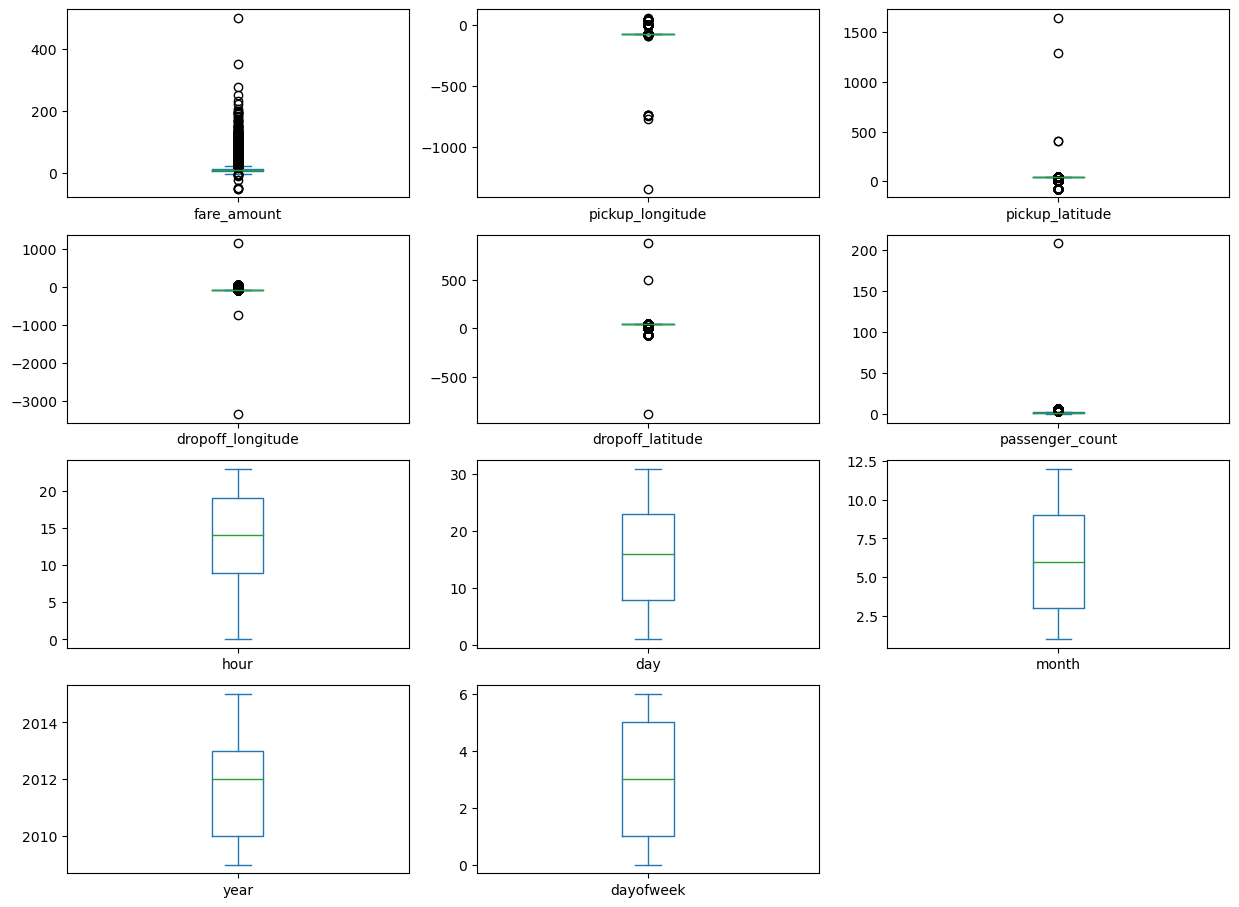

In [14]:
df.plot(kind = "box",subplots = True,layout=(7,3), figsize=(15,20))

In [15]:
col_list=df.columns

In [16]:
for i in col_list:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR = q3 - q1
    lower_whisker = q1-1.5*IQR
    upper_whisker = q3+1.5*IQR
    df[i]=np.clip(df[i],lower_whisker,upper_whisker)

fare_amount             AxesSubplot(0.125,0.786098;0.227941x0.0939024)
pickup_longitude     AxesSubplot(0.398529,0.786098;0.227941x0.0939024)
pickup_latitude      AxesSubplot(0.672059,0.786098;0.227941x0.0939024)
dropoff_longitude       AxesSubplot(0.125,0.673415;0.227941x0.0939024)
dropoff_latitude     AxesSubplot(0.398529,0.673415;0.227941x0.0939024)
passenger_count      AxesSubplot(0.672059,0.673415;0.227941x0.0939024)
hour                    AxesSubplot(0.125,0.560732;0.227941x0.0939024)
day                  AxesSubplot(0.398529,0.560732;0.227941x0.0939024)
month                AxesSubplot(0.672059,0.560732;0.227941x0.0939024)
year                    AxesSubplot(0.125,0.448049;0.227941x0.0939024)
dayofweek            AxesSubplot(0.398529,0.448049;0.227941x0.0939024)
dtype: object

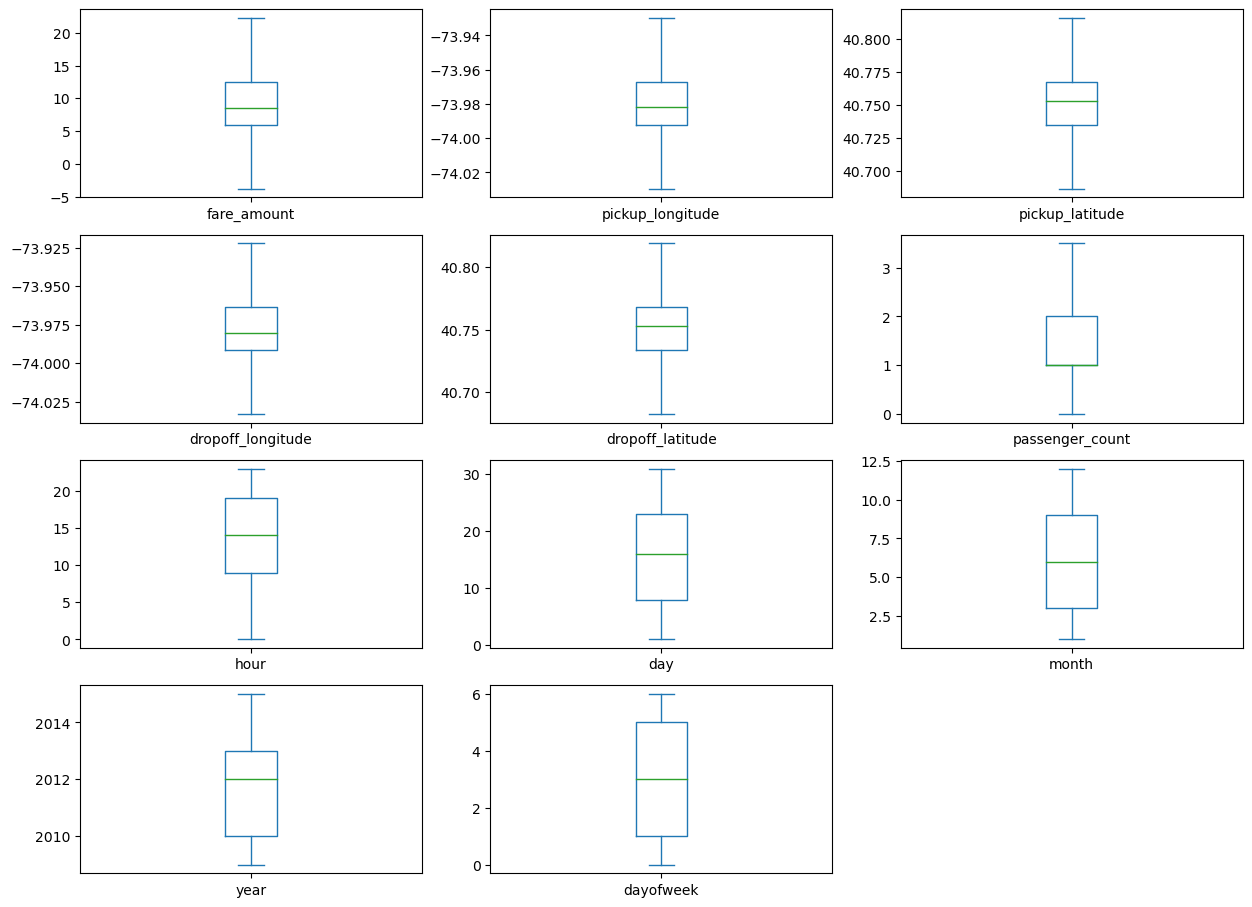

In [17]:
df.plot(kind = "box",subplots = True,layout=(7,3), figsize=(15,20))

In [18]:
travel_dist=[]
for i in range(len(df["pickup_longitude"])):
    long1,lati1,long2,lati2=[df["pickup_longitude"][i],df["pickup_latitude"][i],df["dropoff_longitude"][i],df["dropoff_latitude"][i]]
    loc1 = (lati1,long1)
    loc2 = (lati2,long2)
    c=hs.haversine(loc1,loc2)
    travel_dist.append(c)
df["dist_travel_km"]=travel_dist
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [19]:
df = df.loc[(df.dist_travel_km>=1) | (df.dist_travel_km<=130)]
print("remaining observations in the dataset :", df.shape)

remaining observations in the dataset : (200000, 12)


In [20]:
incorrect_coordinates=df.loc[(df.pickup_latitude > 90)|(df.pickup_latitude<-90)|(df.dropoff_latitude>90)|(df.dropoff_latitude<-90)|(df.pickup_longitude>180)|(df.pickup_longitude<-180)|(df.dropoff_longitude>180)|(df.dropoff_longitude<-180)]

In [21]:
df.shape

(200000, 12)

In [22]:
df.drop(incorrect_coordinates,inplace=True,errors="ignore")

In [23]:
df.shape

(200000, 12)

In [24]:
incorrect_coordinates

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km


<AxesSubplot:>

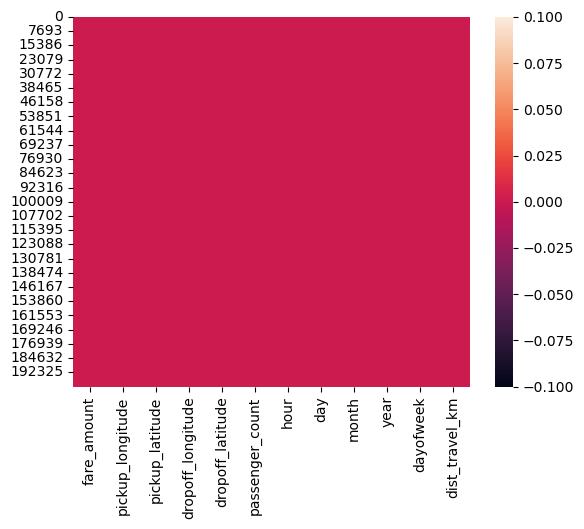

In [25]:
sns.heatmap(df.isnull())

In [26]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218675,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.786385
pickup_longitude,0.154069,1.000000,0.259497,0.425619,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.048446
pickup_latitude,-0.110842,0.259497,1.000000,0.048889,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.073362
dropoff_longitude,0.218675,0.425619,0.048889,1.000000,0.245667,-0.009303,-0.046558,-0.004007,0.002391,0.011346,-0.003336,0.155191
dropoff_latitude,-0.125898,0.073290,0.515714,0.245667,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919,-0.052701
passenger_count,0.015778,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.009884
hour,-0.023623,0.011579,0.029681,-0.046558,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.035708
day,0.004534,-0.003204,-0.001553,-0.004007,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.001709
month,0.030817,0.001169,0.001562,0.002391,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.010050
year,0.141277,0.010198,-0.014243,0.011346,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.022294


<AxesSubplot:>

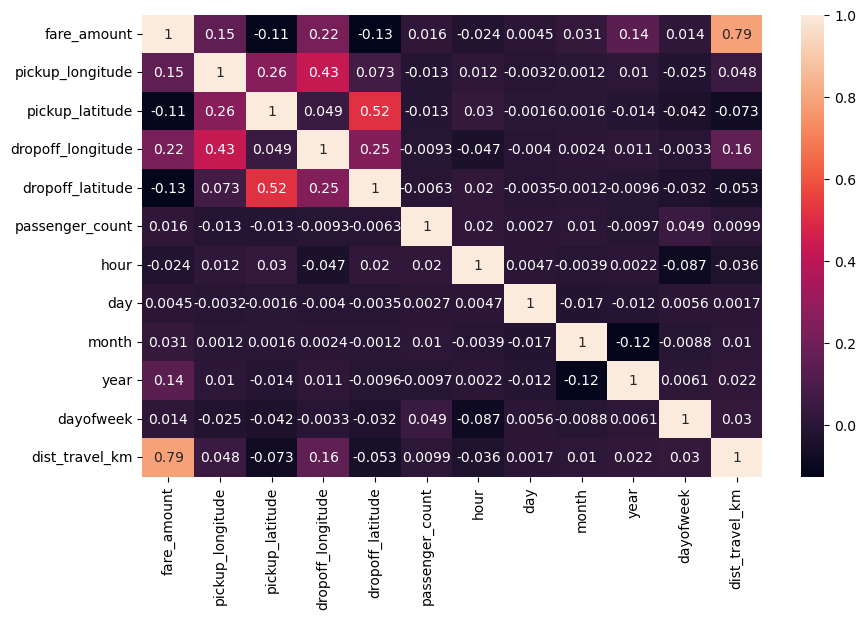

In [27]:
plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

#### Training

In [31]:
x=df[[ 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek', 'dist_travel_km']]

In [32]:
y=df['fare_amount']

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

#### Linear Regression

In [34]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(pred)

[ 5.15833795  9.70386459 11.5274079  ...  5.7799005   7.30135624
 14.33422607]


#### R2, mean square error, rmse

In [35]:
r2_score(y_test,pred)

0.6691492655889187

In [36]:
mean_squared_error(y_test,pred)

9.847595243567516

In [37]:
np.sqrt(mean_squared_error(y_test,pred))

3.1380878323538868

#### Random Forest 

In [40]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(pred)

[ 6.3645  7.9355  9.168  ...  4.865   7.468  11.8375]


#### R2, mean square error, rmse

In [41]:
r2_score(y_test,pred)

0.7966711255662622

In [42]:
mean_squared_error(y_test,pred)

6.051975251974988

In [43]:
np.sqrt(mean_squared_error(y_test,pred))

2.460076269544298